In [1]:
import numpy as np
import matplotlib.pyplot as plt

def data_generation(V, phi, g, num_steps=10**4, dt=0.01, X0=0.0):
    """
    Generate a trajectory based on the given SDE.
    
    Parameters:
        V (function): Function for drift term V(x).
        phi (function): Function for path-dependent term phi(x).
        g (function): Function for path-dependent term g(x).
        num_steps (int): Number of time steps.
        dt (float): Time step size.
        X0 (float): Initial condition.
        
    Returns:
        np.ndarray: The generated trajectory X_t.
    """
    # Initialize the trajectory array
    X = np.zeros(num_steps + 1)
    X[0] = X0

    # Main loop to generate the trajectory
    for i in range(num_steps):
        # Compute R_phi[X_{[0,t]}]
        R_phi = np.sum([phi(np.abs(X[i] - X[j])) * g(X[j]) for j in range(i)]) * dt
        
        # Generate Gaussian random noise
        noise = np.random.normal(0, np.sqrt(dt))
        
        # Euler method to update X
        X[i + 1] = X[i] + dt * (V(X[i]) + R_phi) + noise

    return X



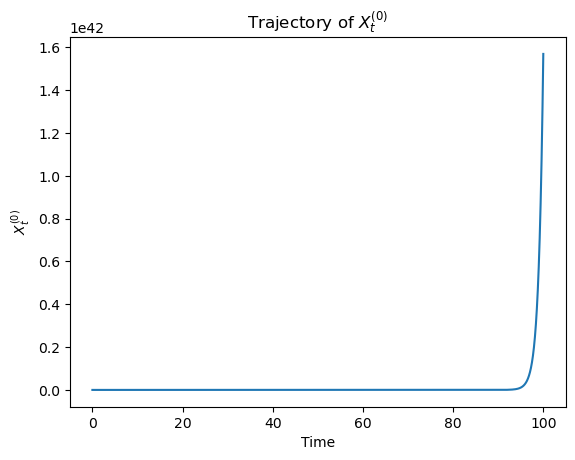

In [8]:
# Define example V, phi, and g functions
def V_example(x):
    return x

def phi_example(x):
    return np.exp(-x**2)

def g_example(x):
    return x**2

# Generate data
X_t_example = data_generation(V_example, phi_example, g_example)

# Plotting
time_array = np.arange(0, (len(X_t_example)) * 0.01, 0.01)
plt.plot(time_array, X_t_example)
plt.xlabel("Time")
plt.ylabel("$X_t^{(0)}$")
plt.title("Trajectory of $X_t^{(0)}$")
plt.show()


In [13]:
# Modify the user's V_1 and g_1 functions to work with NumPy arrays
def V_1(x):
    return np.where((-1 < x) & (x < 1), np.exp(-1 / (1 - x ** 2)), 0)

def phi_1(x):
    return np.exp(-x**2)

def g_1(x):
    return np.where((-1 < x) & (x < 1), np.exp(-1 / (1 - x ** 2)), 0)

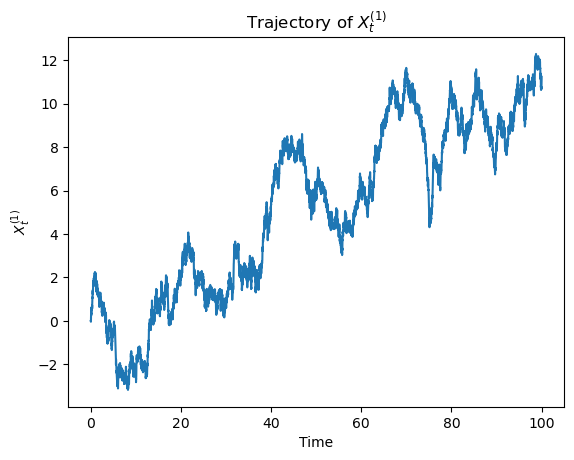

In [9]:
# Generate data
X_t_1 = data_generation(V_1, phi_1, g_1)

# Plotting
time_array = np.arange(0, (len(X_t_1)) * 0.01, 0.01)
plt.plot(time_array, X_t_1)
plt.xlabel("Time")
plt.ylabel("$X_t^{(1)}$")
plt.title("Trajectory of $X_t^{(1)}$")
plt.show()

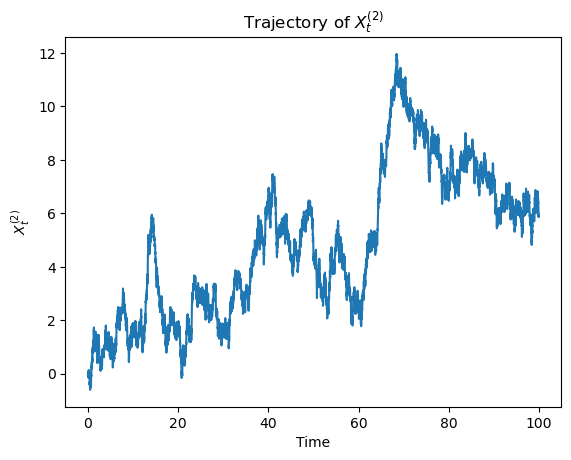

In [6]:
# Generate data
X_t_2 = data_generation(V_1, phi_1, g_1)

# Plotting
time_array = np.arange(0, (len(X_t_2)) * 0.01, 0.01)
plt.plot(time_array, X_t_2)
plt.xlabel("Time")
plt.ylabel("$X_t^{(2)}$")
plt.title("Trajectory of $X_t^{(2)}$")
plt.show()

In [10]:
# Optimizing the data_generation function using NumPy vectorized operations
def optimized_data_generation(V, phi, g, num_steps=10**4, dt=0.01, X0=0.0):
    """
    Generate a trajectory based on the given SDE, optimized using NumPy.
    
    Parameters:
        V (function): Function for drift term V(x).
        phi (function): Function for path-dependent term phi(x).
        g (function): Function for path-dependent term g(x).
        num_steps (int): Number of time steps.
        dt (float): Time step size.
        X0 (float): Initial condition.
        
    Returns:
        np.ndarray: The generated trajectory X_t.
    """
    # Initialize the trajectory array
    X = np.zeros(num_steps + 1)
    X[0] = X0

    # Main loop to generate the trajectory
    for i in range(num_steps):
        # Compute R_phi[X_{[0,t]}] using NumPy vectorized operations
        differences = np.abs(X[i] - X[:i])
        R_phi = np.sum(phi(differences) * g(X[:i])) * dt
        
        # Generate Gaussian random noise
        noise = np.random.normal(0, np.sqrt(dt))
        
        # Euler method to update X
        X[i + 1] = X[i] + dt * (V(X[i]) + R_phi) + noise

    return X

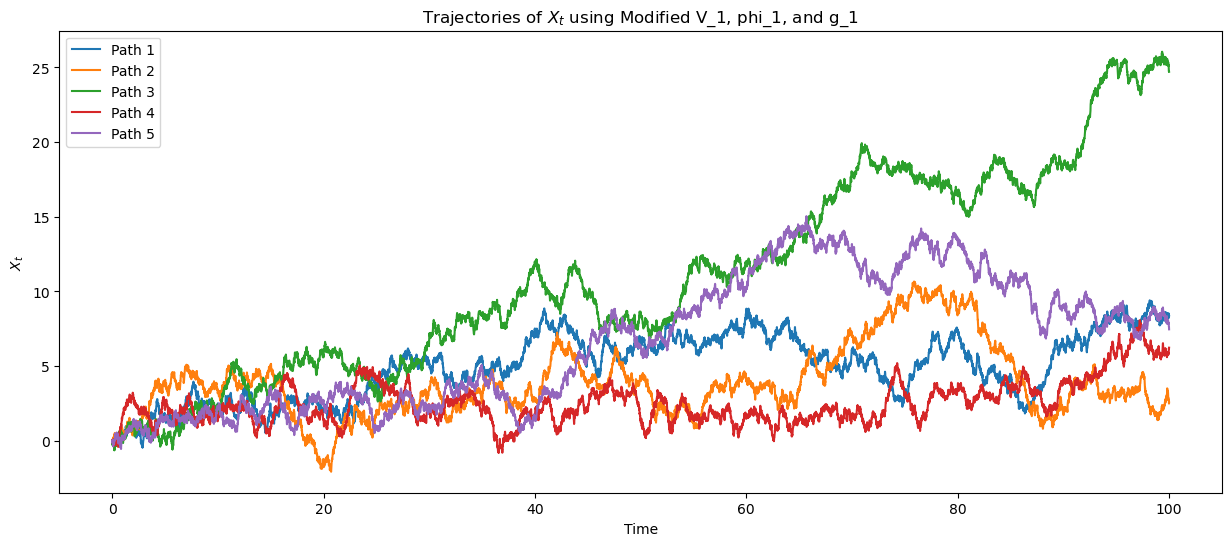

In [14]:
# Generate data for 5 paths using the modified functions and plot them
plt.figure(figsize=(15, 6))  # Wider plot

num_paths = 5
time_array = np.arange(0, (10**4 + 1) * 0.01, 0.01)

for i in range(num_paths):
    X_t = optimized_data_generation(V_1, phi_1, g_1)
    plt.plot(time_array, X_t, label=f'Path {i+1}')

plt.xlabel("Time")
plt.ylabel("$X_t$")
plt.title("Trajectories of $X_t$ using Modified V_1, phi_1, and g_1")
plt.legend()
plt.show()